In [2]:
import pandas as pd
data = pd.read_csv("creditcard_2023.csv")
data.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [3]:
# check for missing vals
data.isnull().sum()

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [4]:
X = data.drop(['id','Class'], axis=1, errors='ignore')
y = data['Class']

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=50)

In [6]:
# scale
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_train_scale = scale.fit_transform(X_train)
X_test_scale = scale.transform(X_test)

In [11]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100,max_depth=10,min_samples_split=5,random_state=50,n_jobs=-1)

In [12]:
from sklearn.model_selection import cross_val_score
import numpy as np
scores = cross_val_score(model,X_train_scale,y_train,cv=2,scoring='f1')
print("Cross-validation scores:",scores)
print("Average scores:",np.mean(scores))

Cross-validation scores: [0.98466404 0.98420096]
Average scores: 0.984432498738308


In [13]:
model.fit(X_train_scale,y_train)

RandomForestClassifier(max_depth=10, min_samples_split=5, n_jobs=-1,
                       random_state=50)

In [14]:
from sklearn.metrics import classification_report
prediction = model.predict(X_test_scale)
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99     57033
           1       1.00      0.97      0.98     56693

    accuracy                           0.99    113726
   macro avg       0.99      0.99      0.99    113726
weighted avg       0.99      0.99      0.99    113726



In [16]:
importance = model.feature_importances_
feature_importance = pd.DataFrame({'Feature':X.columns,'Importance':importance}).sort_values('Importance',ascending=False)
feature_importance.head()

,Feature,Importance
13,V14,0.166306
3,V4,0.157836
9,V10,0.141278
11,V12,0.104629
16,V17,0.100657


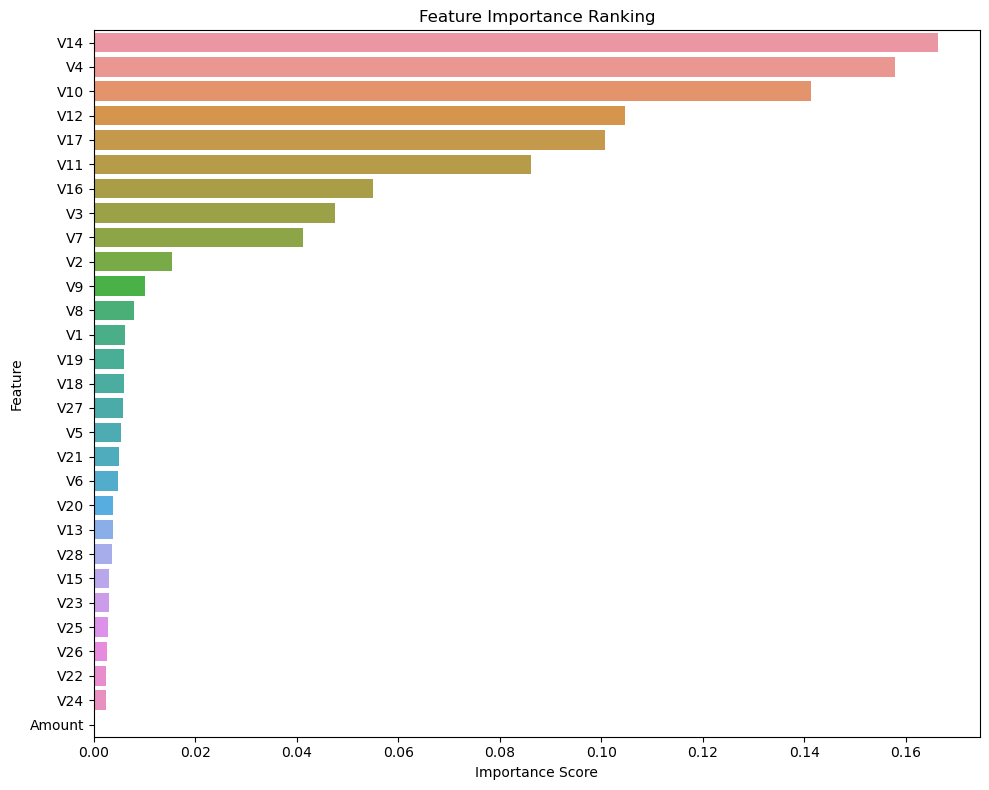

In [17]:
from matplotlib import pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,8))
sns.barplot(data=feature_importance,x='Importance',y='Feature')
plt.title("Feature Importance Ranking")
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()

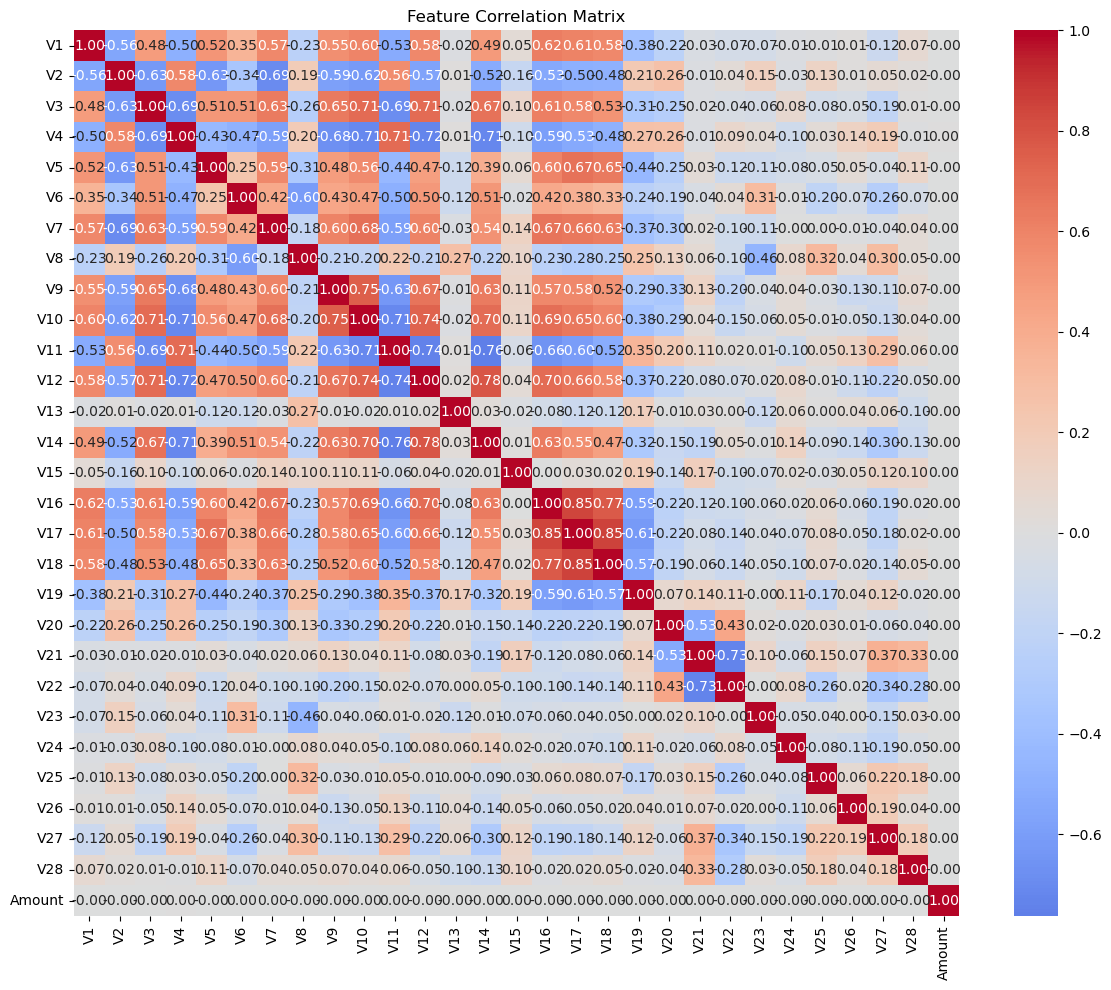

In [18]:
plt.figure(figsize=(12,10))
correlation_matrix = X.corr()
sns.heatmap(correlation_matrix,cmap='coolwarm',center=0,annot=True,fmt='.2f')
plt.title("Feature Correlation Matrix")
plt.tight_layout()
plt.show()